In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel("nobel-prize-laureates.xlsx")
econ_df = df[(df["Category"] == "Economics") & (df["Year"] >= 1969)].dropna(subset=["Motivation"]).copy()
peace_df = df[(df["Category"] == "Peace") & (df["Year"] >= 1969)].dropna(subset=["Motivation"]).copy()



In [ ]:
# BERT model
model = SentenceTransformer("paraphrase-mpnet-base-v2")


In [ ]:
# Econ Clustering
econ_embeddings = model.encode(econ_df["Motivation"].tolist())
econ_kmeans = KMeans(n_clusters=7, random_state=42)
econ_labels = econ_kmeans.fit_predict(econ_embeddings)
econ_df["Cluster"] = econ_labels

In [ ]:
# Peace Clustering
peace_embeddings = model.encode(peace_df["Motivation"].tolist())
peace_kmeans = KMeans(n_clusters=7, random_state=42)
peace_labels = peace_kmeans.fit_predict(peace_embeddings)
peace_df["Cluster"] = peace_labels

In [ ]:
# 6. Her kümeden örnek motivasyonları yazdır
def print_cluster_examples(df, label="Cluster"):
    for i in sorted(df[label].unique()):
        print(f"\n🔷 Cluster {i}")
        samples = df[df[label] == i]["Motivation"].head(100)
        print("\n---\n".join(samples))

print("\n=== 🔍 ECONOMICS CLUSTERS ===")
print_cluster_examples(econ_df)

print("\n=== 🕊️ PEACE CLUSTERS ===")
print_cluster_examples(peace_df)


=== 🔍 ECONOMICS CLUSTERS ===

🔷 Cluster 0
"for their pioneering analysis of equilibria in the theory of non-cooperative games"
---
"for their pioneering analysis of equilibria in the theory of non-cooperative games"
---
"for their pioneering analysis of equilibria in the theory of non-cooperative games"
---
"for having enhanced our understanding of conflict and cooperation through game-theory analysis"
---
"for having enhanced our understanding of conflict and cooperation through game-theory analysis"

🔷 Cluster 1
"for their empirical analysis of asset prices"
---
"for their empirical analysis of asset prices"
---
"for their empirical analysis of asset prices"

🔷 Cluster 2
"for the scientific work through which he has developed static and dynamic economic theory and actively contributed to raising the level of analysis in economic science"
---
"for their pioneering contributions to general economic equilibrium theory and welfare theory"
---
"for their pioneering contributions to gener

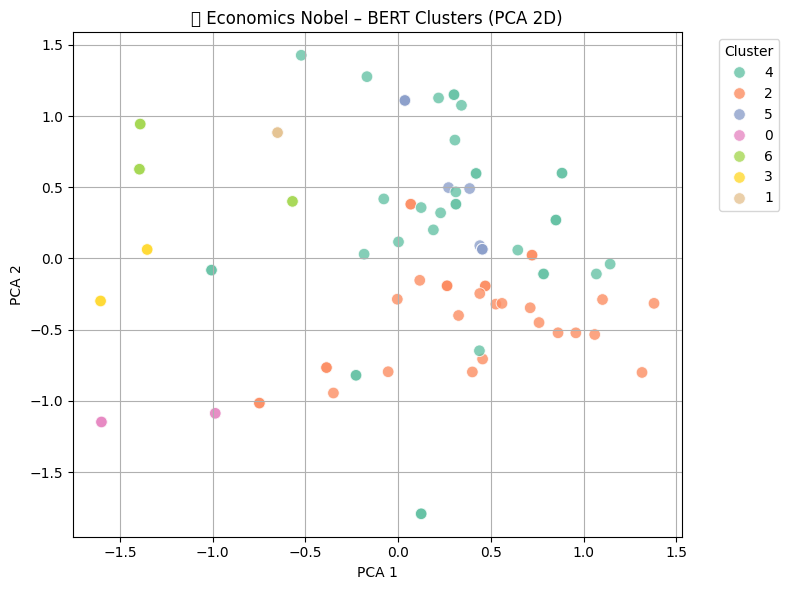

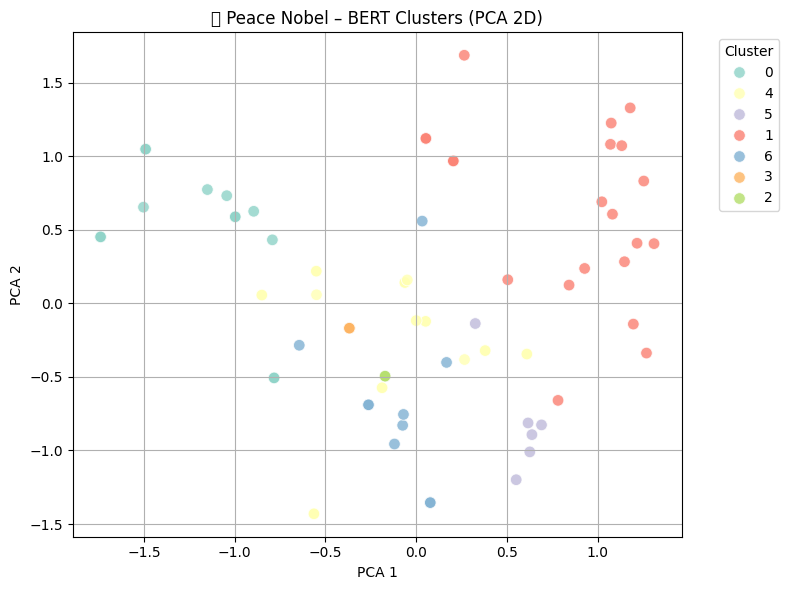

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# 1. PCA ile boyut indirgeme
pca_econ = PCA(n_components=2).fit_transform(econ_embeddings)
pca_peace = PCA(n_components=2).fit_transform(peace_embeddings)

# 2. Veri çerçevelerini hazırlama
econ_vis_df = pd.DataFrame({
    "x": pca_econ[:, 0],
    "y": pca_econ[:, 1],
    "Cluster": econ_df["Cluster"].astype(str)
})

peace_vis_df = pd.DataFrame({
    "x": pca_peace[:, 0],
    "y": pca_peace[:, 1],
    "Cluster": peace_df["Cluster"].astype(str)
})

# 3. ECONOMICS PLOT
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=econ_vis_df,
    x="x", y="y",
    hue="Cluster",
    palette="Set2",
    alpha=0.8,
    s=70
)
plt.title("📈 Economics Nobel – BERT Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. PEACE PLOT
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=peace_vis_df,
    x="x", y="y",
    hue="Cluster",
    palette="Set3",
    alpha=0.8,
    s=70
)
plt.title("🕊️ Peace Nobel – BERT Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Genişletilmiş stopword listesi (gerekirse daha da artırılabilir)
custom_stopwords = set(ENGLISH_STOP_WORDS).union({
    "for", "of", "the", "to", "in", "a", "and", "on", "their", "his", "her", "they", "its", "with", "by", "as", "an","end","use","used","having",
    "new",
})

# Temizleme fonksiyonu + stopword çıkarma
def clean_text_filtered(text):
    import re
    text = text.lower()
    words = re.sub(r"[^a-z\s]", "", text).split()
    return [w for w in words if w not in custom_stopwords]

# ECONOMICS
econ_cluster_keywords = {}
for clus in sorted(econ_df["Cluster"].unique()):
    texts = econ_df.loc[econ_df["Cluster"] == clus, "Motivation"].dropna()
    words = sum([clean_text_filtered(txt) for txt in texts], [])
    common_words = Counter(words).most_common(10)
    econ_cluster_keywords[clus] = common_words

print("\n📈 ECONOMICS CLUSTER KEYWORDS (filtered):")
for clus, words in econ_cluster_keywords.items():
    formatted = ", ".join([f"{w} ({c})" for w, c in words])
    print(f"Cluster {clus}: {formatted}")

# PEACE
peace_cluster_keywords = {}
for clus in sorted(peace_df["Cluster"].unique()):
    texts = peace_df.loc[peace_df["Cluster"] == clus, "Motivation"].dropna()
    words = sum([clean_text_filtered(txt) for txt in texts], [])
    common_words = Counter(words).most_common(10)
    peace_cluster_keywords[clus] = common_words

print("\n🕊️ PEACE CLUSTER KEYWORDS (filtered):")
for clus, words in peace_cluster_keywords.items():
    formatted = ", ".join([f"{w} ({c})" for w, c in words])
    print(f"Cluster {clus}: {formatted}")



📈 ECONOMICS CLUSTER KEYWORDS (filtered):
Cluster 0: analysis (5), pioneering (3), equilibria (3), theory (3), noncooperative (3), games (3), enhanced (2), understanding (2), conflict (2), cooperation (2)
Cluster 1: empirical (3), analysis (3), asset (3), prices (3)
Cluster 2: theory (21), economic (14), contributions (11), analysis (8), pioneering (6), welfare (4), international (4), poverty (4), work (3), general (3)
Cluster 3: theory (4), auction (4), stable (2), allocations (2), practice (2), market (2), design (2), improvements (2), inventions (2), formats (2)
Cluster 4: economic (25), analysis (13), research (9), theory (6), development (5), contributions (5), dynamic (4), empirical (4), foundations (4), methods (4)
Cluster 5: financial (8), pioneering (4), analysis (3), work (3), theory (3), economics (3), research (3), banks (3), crises (3), markets (2)
Cluster 6: markets (6), asymmetric (5), information (5), analyses (3), analysis (3), search (3), frictions (3), fundamental (2

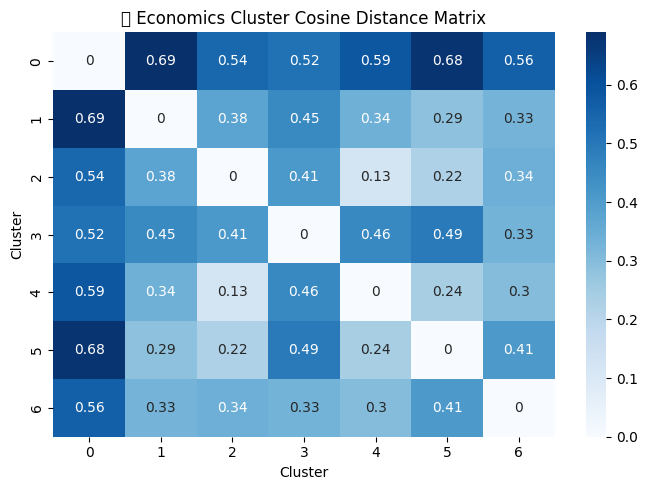

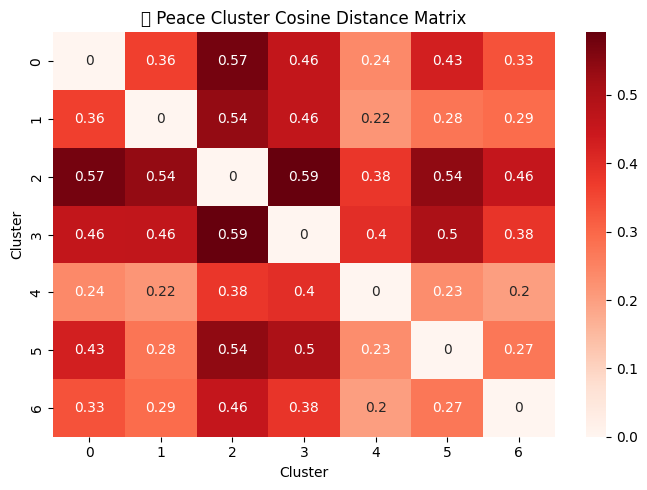

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cluster merkezlerini hesaplayan fonksiyon
def compute_cluster_centroids(embeddings, labels):
    centroids = {}
    for cluster_id in np.unique(labels):
        cluster_vectors = embeddings[labels == cluster_id]
        centroid = np.mean(cluster_vectors, axis=0)
        centroids[cluster_id] = centroid
    return centroids

# 2. Economics
econ_centroids = compute_cluster_centroids(np.array(econ_embeddings), np.array(econ_df["Cluster"]))
econ_centroid_matrix = np.stack([econ_centroids[i] for i in sorted(econ_centroids)])
econ_distances = cosine_distances(econ_centroid_matrix)

# 3. Peace
peace_centroids = compute_cluster_centroids(np.array(peace_embeddings), np.array(peace_df["Cluster"]))
peace_centroid_matrix = np.stack([peace_centroids[i] for i in sorted(peace_centroids)])
peace_distances = cosine_distances(peace_centroid_matrix)

# 4. Görselleştir: Heatmap (Economics)
plt.figure(figsize=(7, 5))
sns.heatmap(econ_distances, annot=True, cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.title("📈 Economics Cluster Cosine Distance Matrix")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# 5. Görselleştir: Heatmap (Peace)
plt.figure(figsize=(7, 5))
sns.heatmap(peace_distances, annot=True, cmap="Reds", xticklabels=range(7), yticklabels=range(7))
plt.title("🕊️ Peace Cluster Cosine Distance Matrix")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


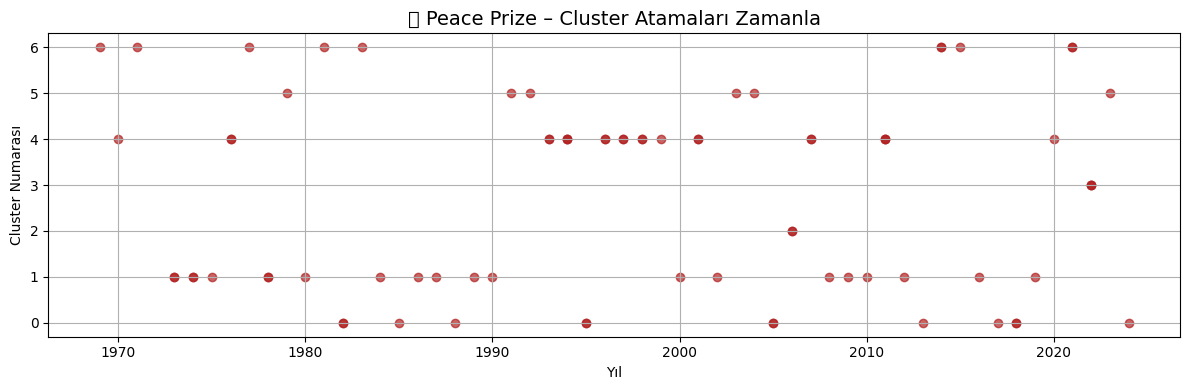

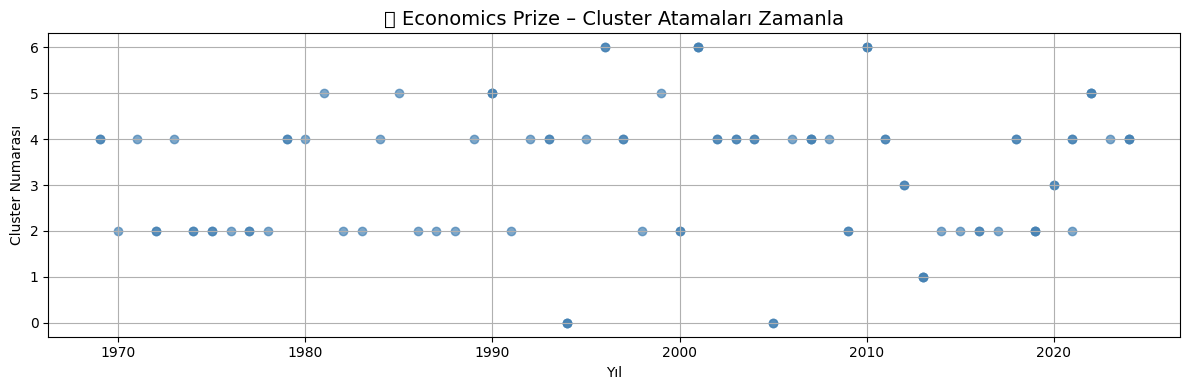

In [ ]:
import matplotlib.pyplot as plt

# Barış için yıl–cluster dağılımı
plt.figure(figsize=(12, 4))
plt.scatter(peace_df["Year"], peace_df["Cluster"], c='firebrick', alpha=0.7)
plt.title("🕊️ Peace Prize – Cluster Atamaları Zamanla", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Cluster Numarası")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ekonomi için yıl–cluster dağılımı
plt.figure(figsize=(12, 4))
plt.scatter(econ_df["Year"], econ_df["Cluster"], c='steelblue', alpha=0.7)
plt.title("📈 Economics Prize – Cluster Atamaları Zamanla", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Cluster Numarası")
plt.grid(True)
plt.tight_layout()
plt.show()


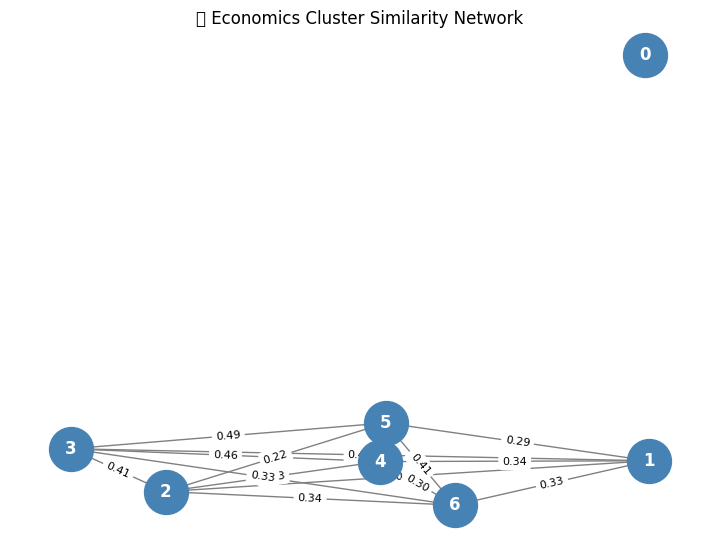

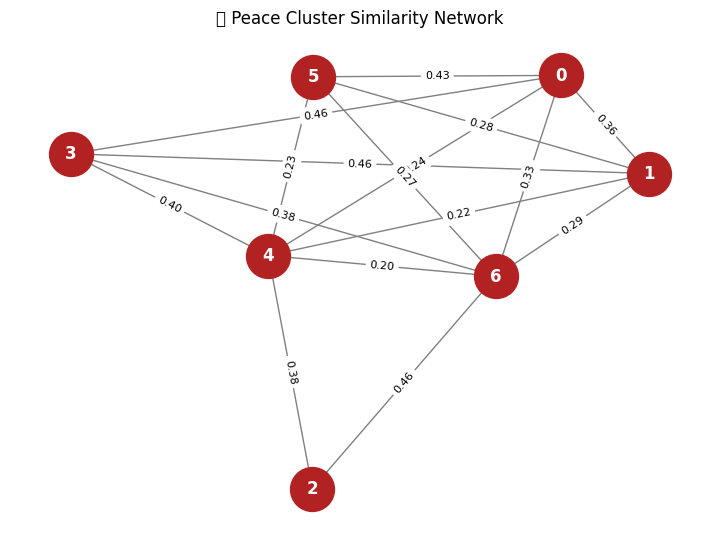

In [ ]:
import networkx as nx

def plot_cluster_similarity_network(distance_matrix, title, color):
    G = nx.Graph()
    labels = list(range(distance_matrix.shape[0]))

    # Düğümleri ve etiketlerini ekle
    for i in labels:
        G.add_node(i, label=f"Cluster {i}")

    # Mesafelere göre kenarları oluştur (sadece 0.5'ten yakınları)
    for i in labels:
        for j in labels:
            if i < j and distance_matrix[i, j] < 0.5:
                G.add_edge(i, j, weight=1 - distance_matrix[i, j])

    # Pozisyonları hesapla
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(7, 5))
    nx.draw(G, pos, with_labels=True, node_color=color, edge_color='gray',
            node_size=1000, font_weight='bold', font_color='white')
    weights = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{1-v:.2f}" for k, v in weights.items()}, font_size=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Kullan
plot_cluster_similarity_network(econ_distances, "📈 Economics Cluster Similarity Network", "steelblue")
plot_cluster_similarity_network(peace_distances, "🕊️ Peace Cluster Similarity Network", "firebrick")


In [ ]:
import numpy as np
from collections import defaultdict

def get_yearly_embeddings(df, embeddings):
    """
    df: orijinal dataframe (motivations ve Year sütunları içermeli)
    embeddings: her motivasyon cümlesinin sırayla embedding vektörü

    return: {year: ortalama vektör}
    """
    year_to_vecs = defaultdict(list)

    for motivation, year, vec in zip(df["Motivation"], df["Year"], embeddings):
        if isinstance(year, int) or (isinstance(year, float) and not np.isnan(year)):
            year_to_vecs[int(year)].append(vec)

    # Ortalamasını al
    year_avg_embeddings = {
        year: np.mean(vecs, axis=0)
        for year, vecs in year_to_vecs.items()
    }

    return year_avg_embeddings


In [ ]:
econ_embeddings = model.encode(econ_df["Motivation"].tolist())
econ_year_embeddings = get_yearly_embeddings(econ_df, econ_embeddings)


In [ ]:
peace_embeddings = model.encode(peace_df["Motivation"].tolist())
peace_year_embeddings = get_yearly_embeddings(peace_df, peace_embeddings)


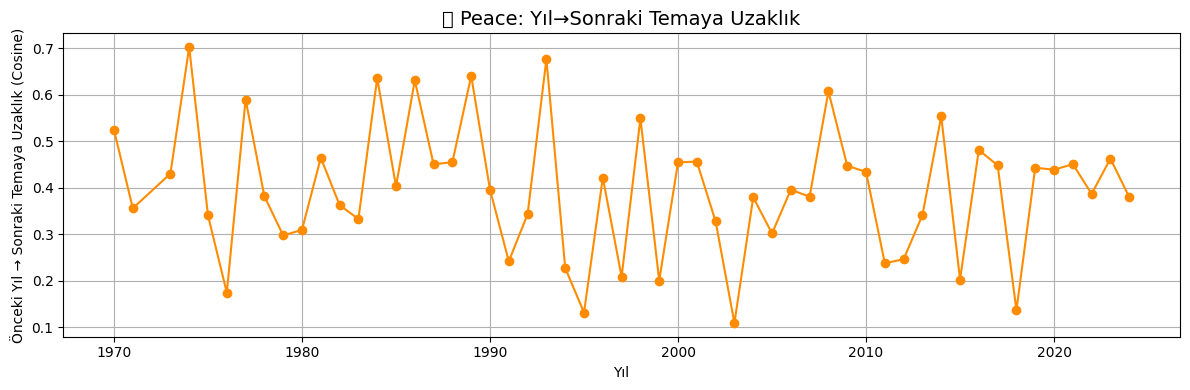

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

def compute_transition_to_next_cluster(year_embeddings, year_clusters, cluster_centers, title):
    years = sorted(year_embeddings.keys())
    transition_distances = []

    for i in range(len(years) - 1):
        y_current = years[i]
        y_next = years[i + 1]

        v_prev = year_embeddings[y_current]
        cluster_next = year_clusters[y_next]
        v_center = cluster_centers[cluster_next]

        dist = cosine_distances([v_prev], [v_center])[0][0]
        transition_distances.append((y_next, dist))

    # Plot
    year_vals = [x[0] for x in transition_distances]
    dist_vals = [x[1] for x in transition_distances]

    plt.figure(figsize=(12, 4))
    plt.plot(year_vals, dist_vals, marker="o", color="darkorange")
    plt.title(title, fontsize=14)
    plt.xlabel("Yıl")
    plt.ylabel("Önceki Yıl → Sonraki Temaya Uzaklık (Cosine)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Kullanım (örnek Peace için)
compute_transition_to_next_cluster(peace_year_embeddings, peace_year_cluster_dict, peace_centroid_matrix, "🕊️ Peace: Yıl→Sonraki Temaya Uzaklık")


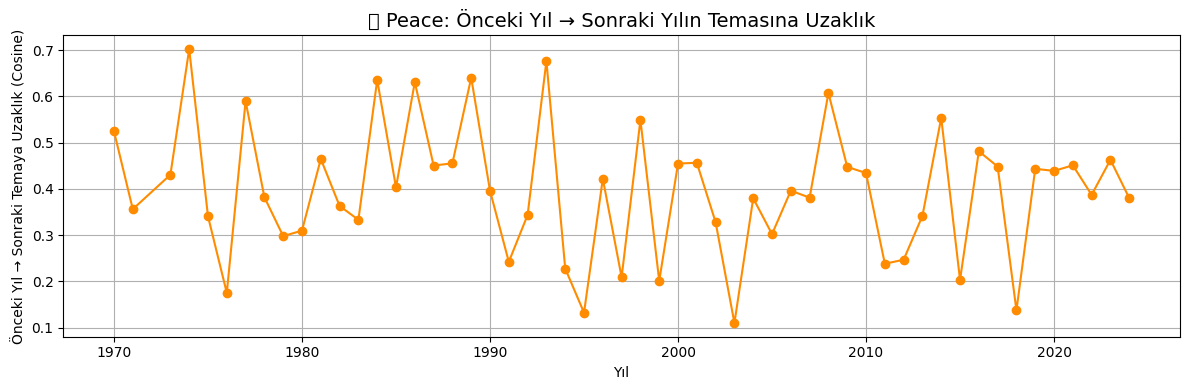

In [ ]:
compute_transition_to_next_cluster(
    peace_year_embeddings,
    peace_year_cluster_dict,
    peace_centroid_matrix,
    "🕊️ Peace: Önceki Yıl → Sonraki Yılın Temasına Uzaklık"
)


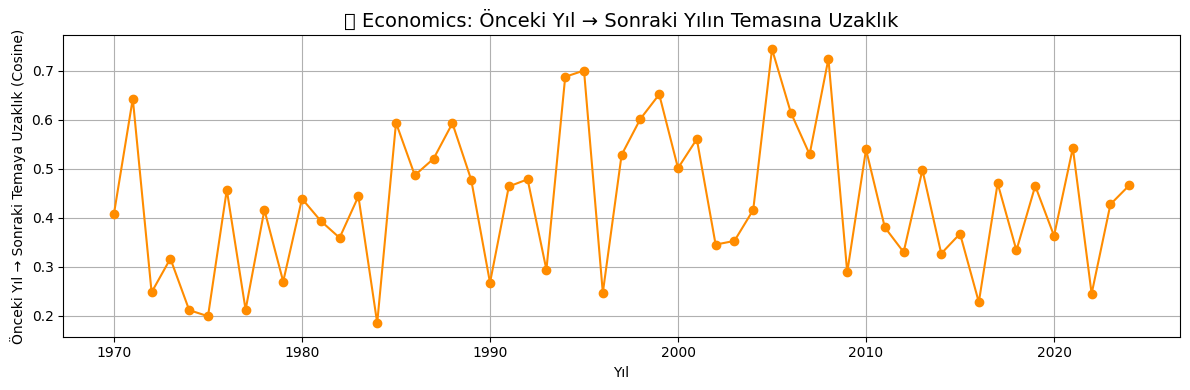

In [ ]:
compute_transition_to_next_cluster(
    econ_year_embeddings,
    econ_year_cluster_dict,
    econ_centroid_matrix,
    "📈 Economics: Önceki Yıl → Sonraki Yılın Temasına Uzaklık"
)


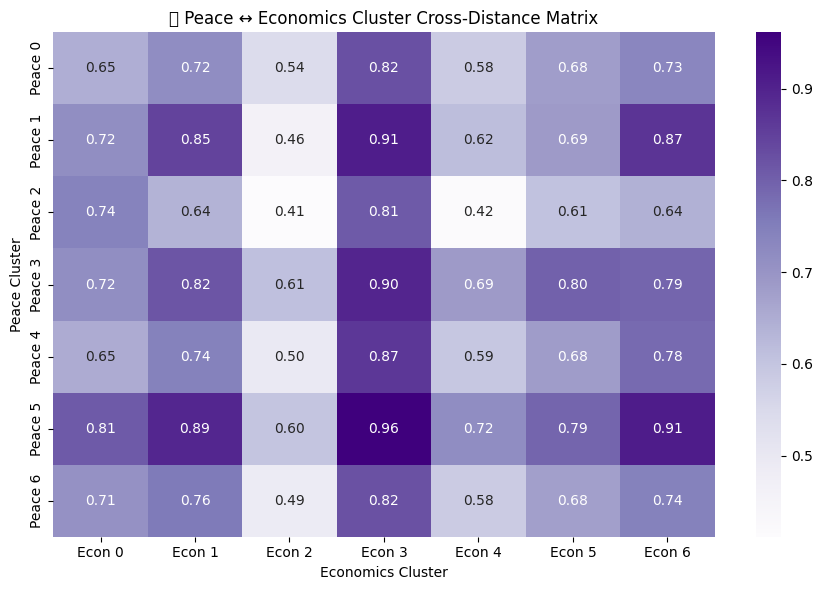

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances

# Cross-cosine distance matrix
cross_dist = cosine_distances(peace_centroid_matrix, econ_centroid_matrix)

# Plot heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(cross_dist, annot=True, fmt=".2f", cmap="Purples",
            xticklabels=[f"Econ {i}" for i in range(7)],
            yticklabels=[f"Peace {i}" for i in range(7)])
plt.title("🌍 Peace ↔ Economics Cluster Cross-Distance Matrix")
plt.xlabel("Economics Cluster")
plt.ylabel("Peace Cluster")
plt.tight_layout()
plt.show()


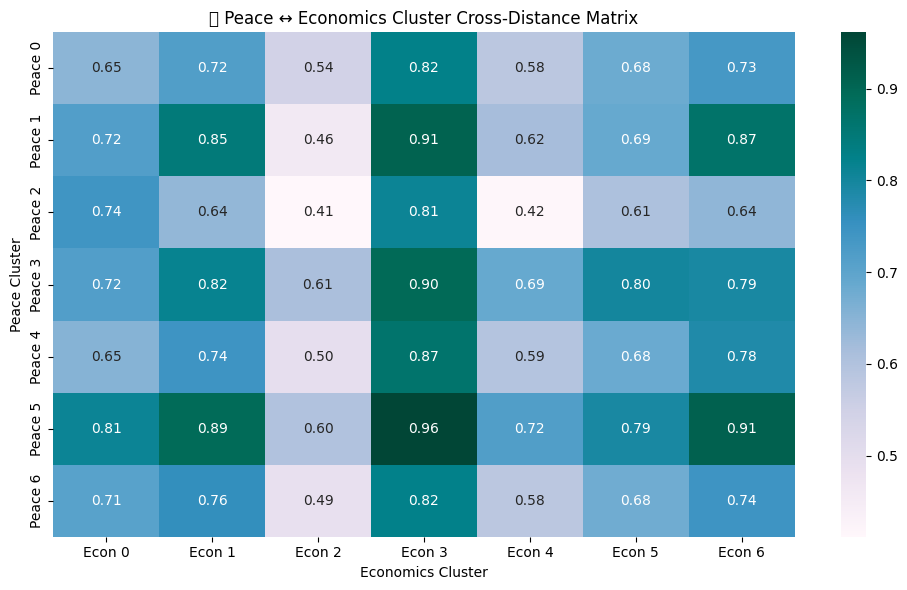

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
import matplotlib.pyplot as plt

cross_dist = cosine_distances(peace_centroid_matrix, econ_centroid_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(cross_dist, annot=True, cmap="PuBuGn", fmt=".2f",
            xticklabels=[f"Econ {i}" for i in range(7)],
            yticklabels=[f"Peace {i}" for i in range(7)])
plt.title("🌍 Peace ↔ Economics Cluster Cross-Distance Matrix")
plt.xlabel("Economics Cluster")
plt.ylabel("Peace Cluster")
plt.tight_layout()
plt.show()


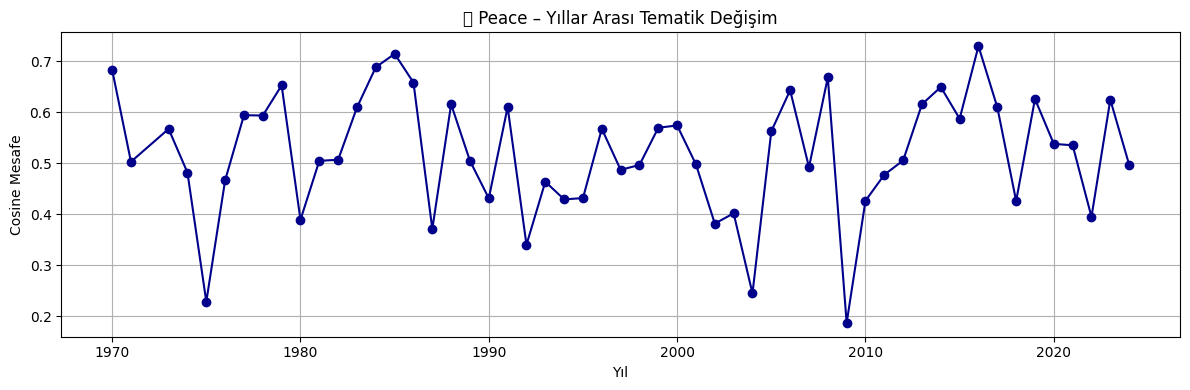

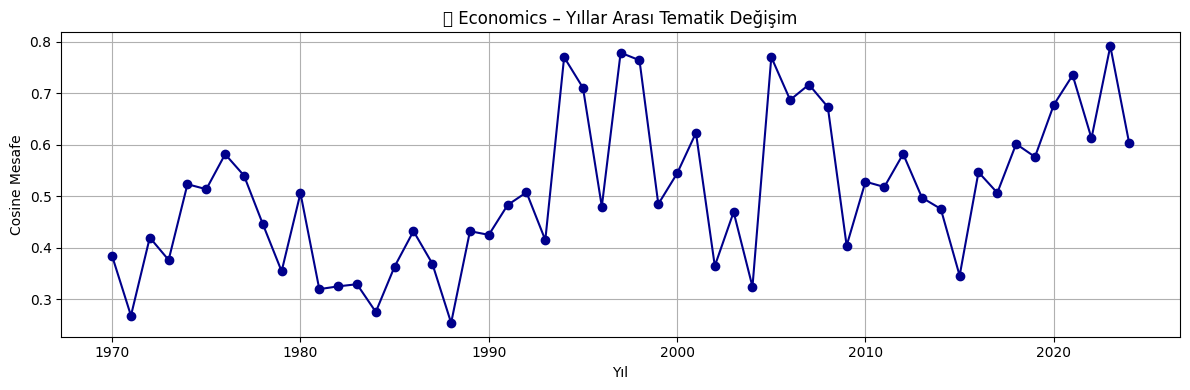

In [ ]:
def compute_year_to_year_cosine(year_embeddings, title):
    years = sorted(year_embeddings.keys())
    dists = []
    for i in range(len(years)-1):
        y1, y2 = years[i], years[i+1]
        v1, v2 = year_embeddings[y1], year_embeddings[y2]
        dist = cosine_distances([v1], [v2])[0][0]
        dists.append((y2, dist))

    # Plot
    plt.figure(figsize=(12, 4))
    x_vals, y_vals = zip(*dists)
    plt.plot(x_vals, y_vals, marker="o", color="darkblue")
    plt.title(title)
    plt.xlabel("Yıl")
    plt.ylabel("Cosine Mesafe")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Örnek:
compute_year_to_year_cosine(peace_year_embeddings, "🕊️ Peace – Yıllar Arası Tematik Değişim")
compute_year_to_year_cosine(econ_year_embeddings, "📈 Economics – Yıllar Arası Tematik Değişim")


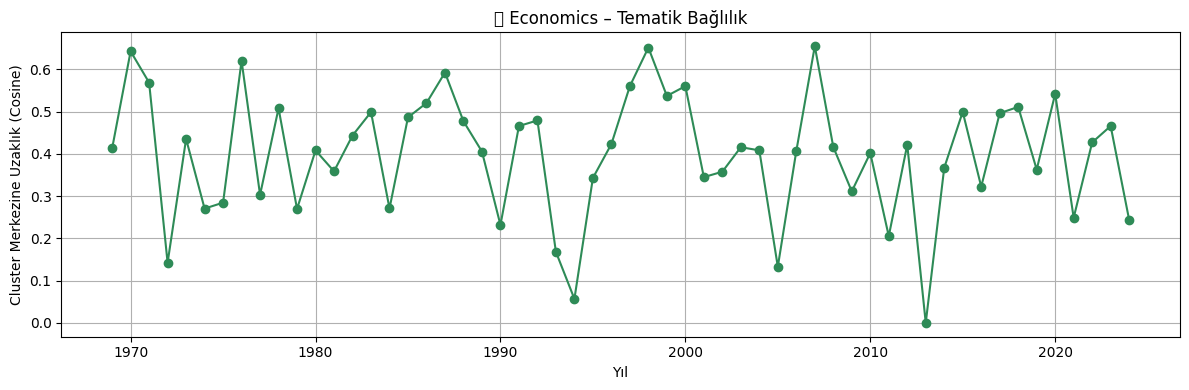

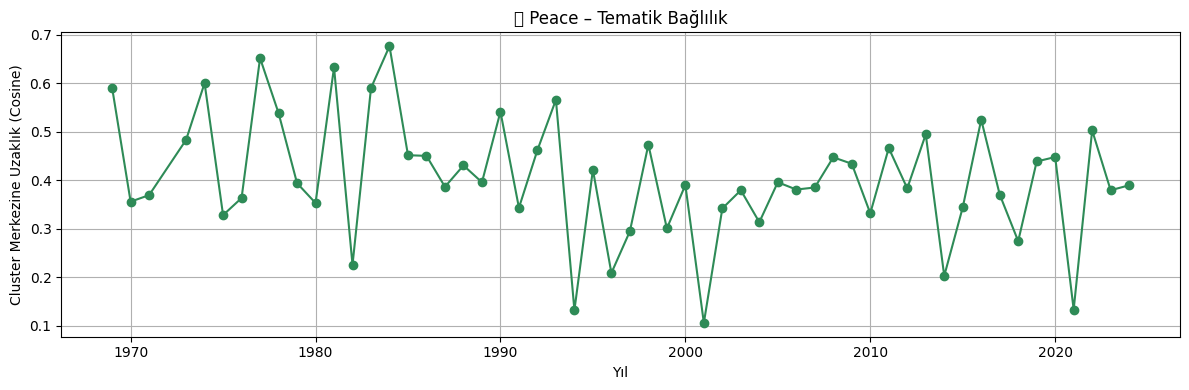

In [ ]:
def compute_thematic_commitment(year_embeddings, year_clusters, cluster_centers, title):
    years = sorted(year_embeddings.keys())
    commitment = []

    for year in years:
        year_vec = year_embeddings[year]
        cluster_id = year_clusters[year]
        cluster_center = cluster_centers[cluster_id]
        dist = cosine_distances([year_vec], [cluster_center])[0][0]
        commitment.append((year, dist))

    # Plot
    x_vals, y_vals = zip(*commitment)
    plt.figure(figsize=(12, 4))
    plt.plot(x_vals, y_vals, marker="o", color="seagreen")
    plt.title(title)
    plt.xlabel("Yıl")
    plt.ylabel("Cluster Merkezine Uzaklık (Cosine)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Örnek:
compute_thematic_commitment(econ_year_embeddings, econ_year_cluster_dict, econ_centroid_matrix, "📈 Economics – Tematik Bağlılık")
compute_thematic_commitment(peace_year_embeddings, peace_year_cluster_dict, peace_centroid_matrix, "🕊️ Peace – Tematik Bağlılık")


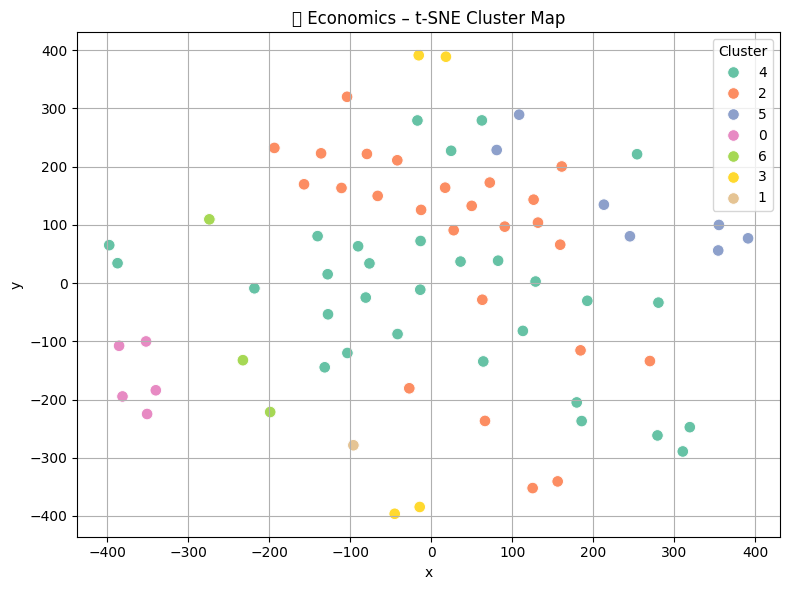

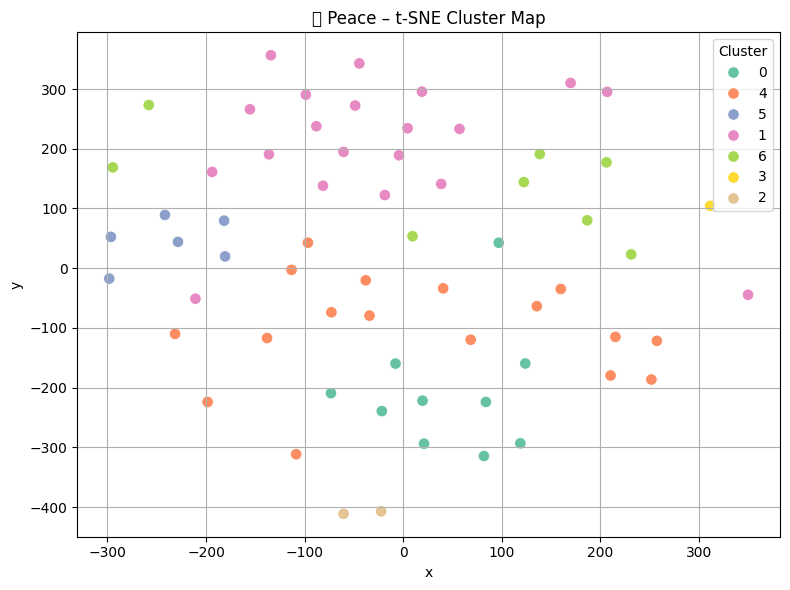

In [ ]:
from sklearn.manifold import TSNE

def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_proj = tsne.fit_transform(embeddings)

    df_vis = pd.DataFrame({
        "x": tsne_proj[:, 0],
        "y": tsne_proj[:, 1],
        "Cluster": labels.astype(str)
    })

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_vis, x="x", y="y", hue="Cluster", palette="Set2", s=70)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_tsne(econ_embeddings, econ_df["Cluster"], "📈 Economics – t-SNE Cluster Map")
plot_tsne(peace_embeddings, peace_df["Cluster"], "🕊️ Peace – t-SNE Cluster Map")


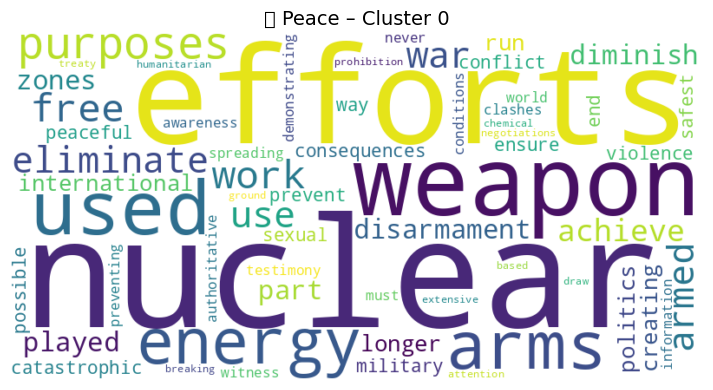

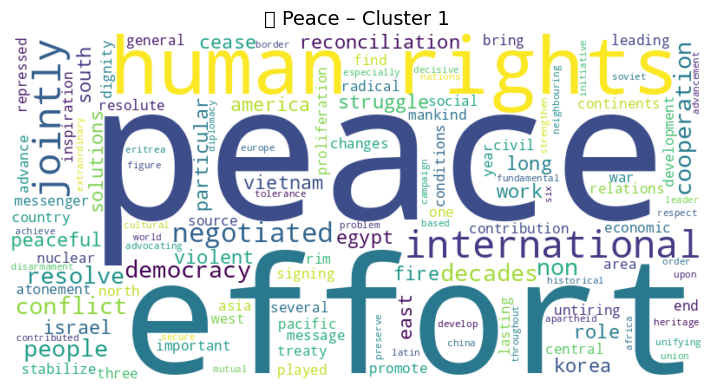

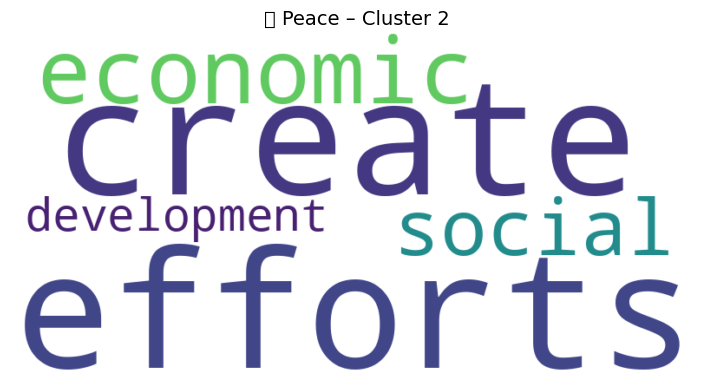

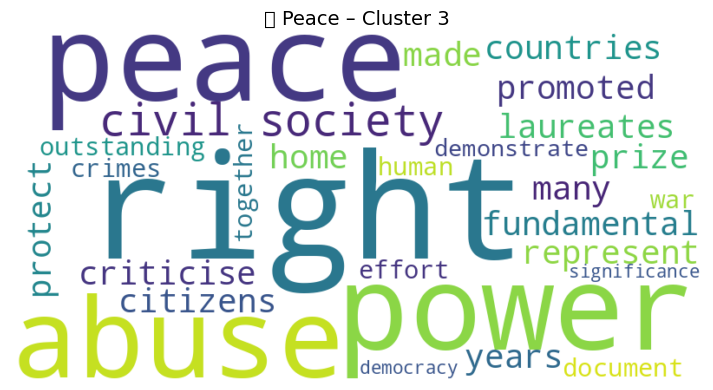

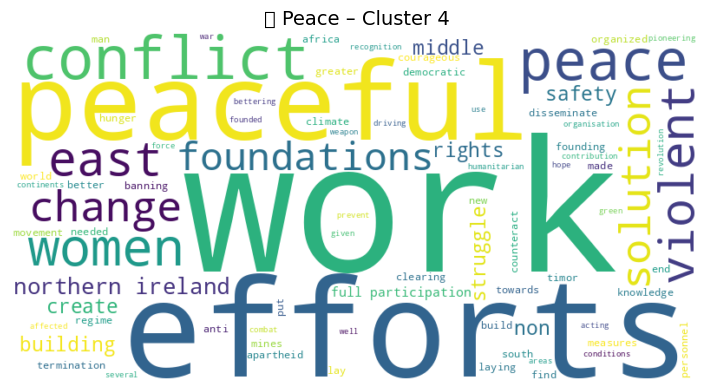

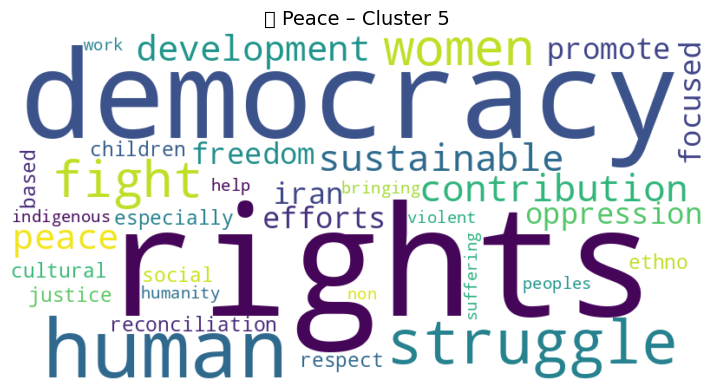

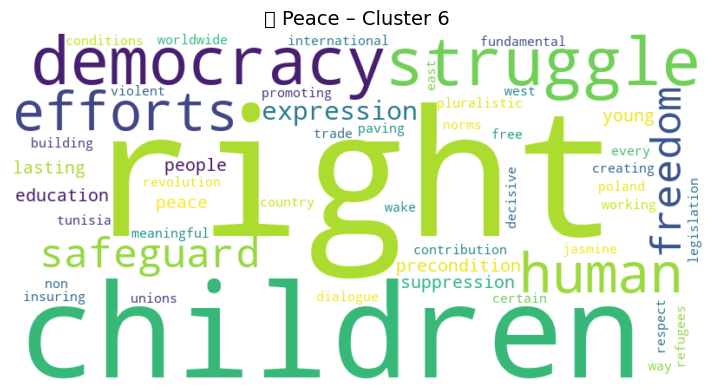

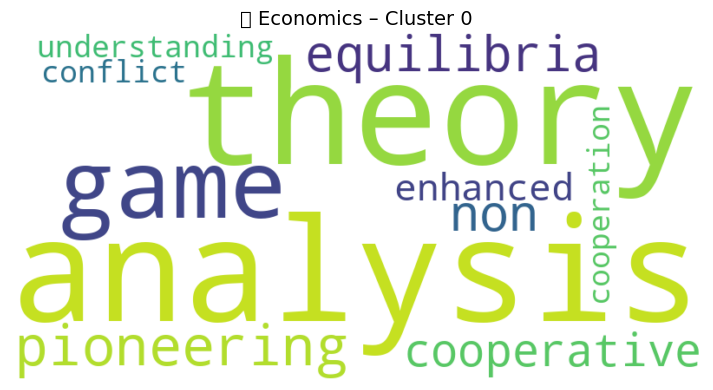

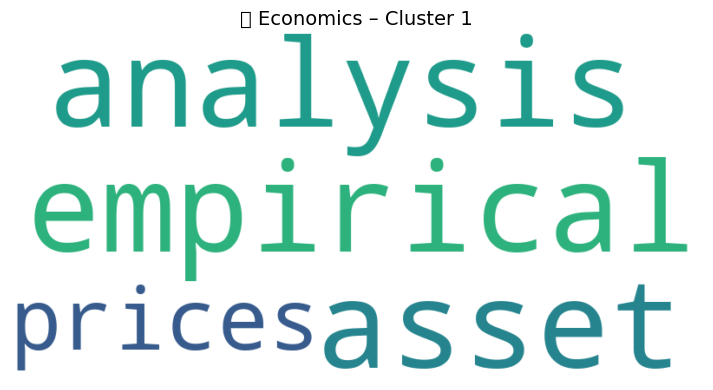

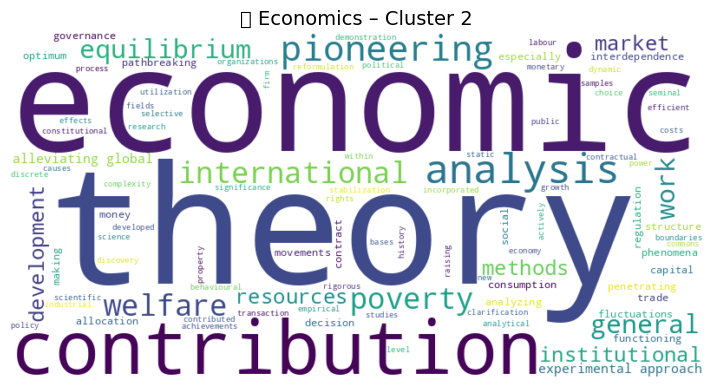

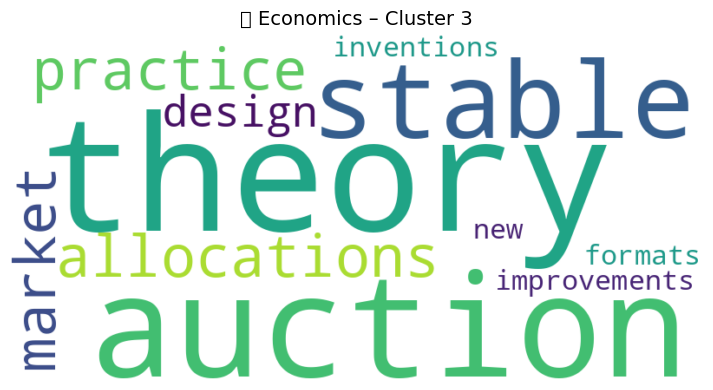

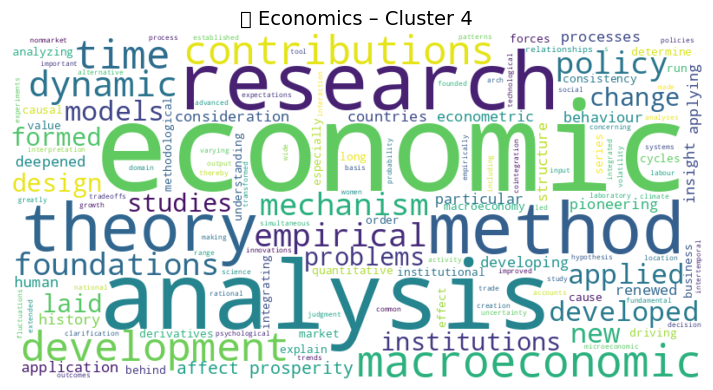

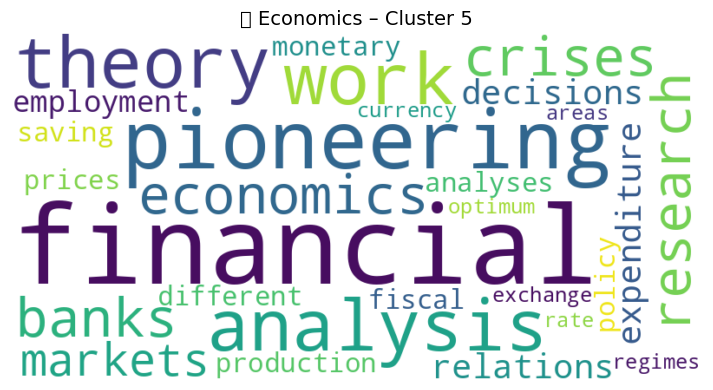

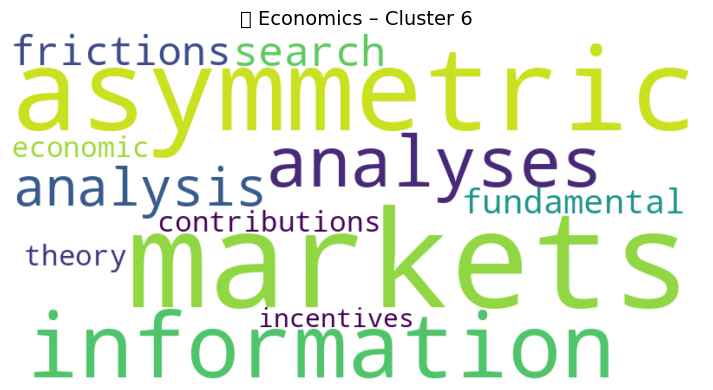

In [ ]:
from wordcloud import WordCloud

def plot_wordclouds_by_cluster(df, num_clusters, title_prefix):
    for clus in range(num_clusters):
        texts = df[df["Cluster"] == clus]["Motivation"].dropna().tolist()
        text_blob = " ".join(texts).lower()

        wc = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

        plt.figure(figsize=(10, 4))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{title_prefix} – Cluster {clus}", fontsize=14)
        plt.tight_layout()
        plt.show()


plot_wordclouds_by_cluster(peace_df, 7, "🕊️ Peace")
plot_wordclouds_by_cluster(econ_df, 7, "📈 Economics")


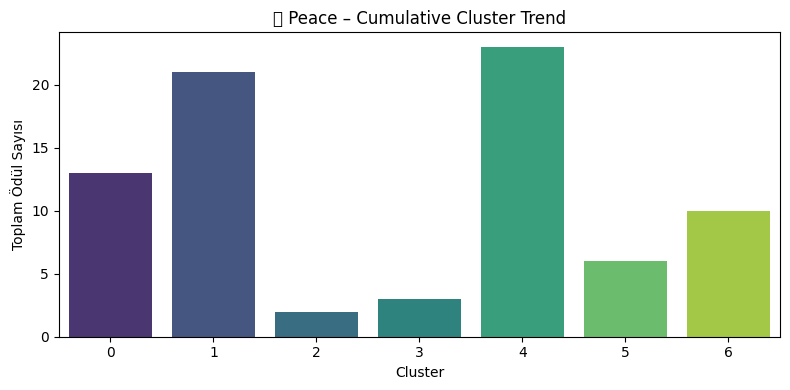

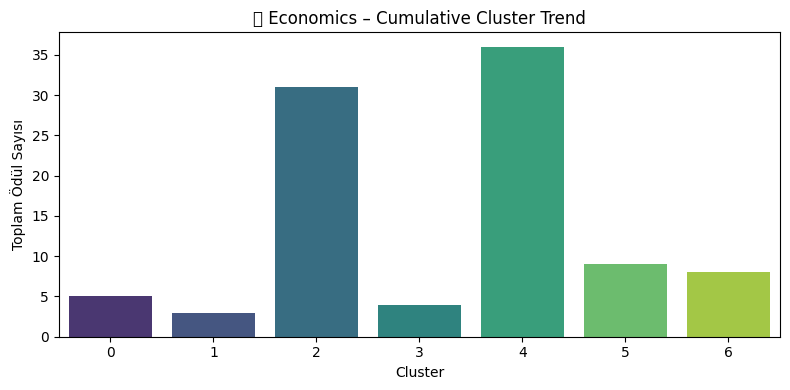

In [ ]:
def plot_cumulative_cluster_trend(df, title):
    cum_counts = df["Cluster"].value_counts().sort_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=cum_counts.index, y=cum_counts.values, palette="viridis")
    plt.title(title)
    plt.xlabel("Cluster")
    plt.ylabel("Toplam Ödül Sayısı")
    plt.tight_layout()
    plt.show()


plot_cumulative_cluster_trend(peace_df, "🕊️ Peace – Cumulative Cluster Trend")
plot_cumulative_cluster_trend(econ_df, "📈 Economics – Cumulative Cluster Trend")


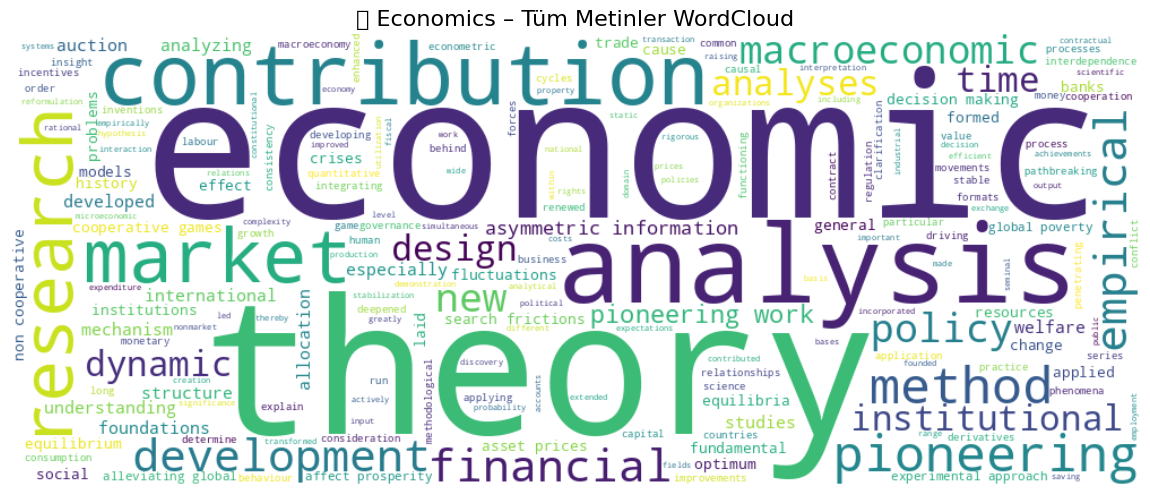

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_all(df, title):
    texts = df["Motivation"].dropna().tolist()
    text_blob = " ".join(texts).lower()

    wc = WordCloud(width=1000, height=400, background_color='white').generate(text_blob)

    plt.figure(figsize=(12, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Kullanım:
plot_wordcloud_all(econ_df, "📈 Economics – Tüm Metinler WordCloud")


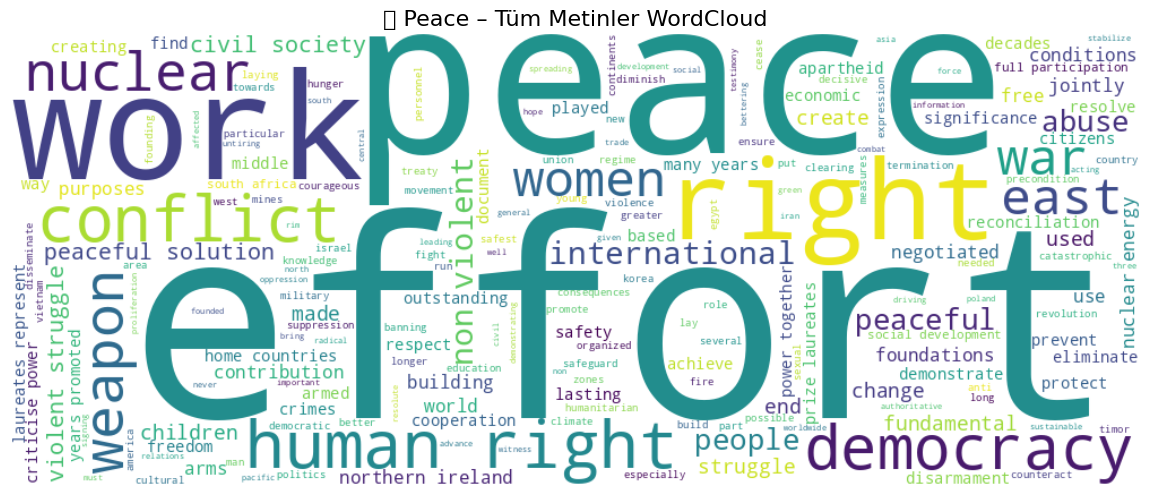

In [ ]:
plot_wordcloud_all(peace_df, "🕊️ Peace – Tüm Metinler WordCloud")


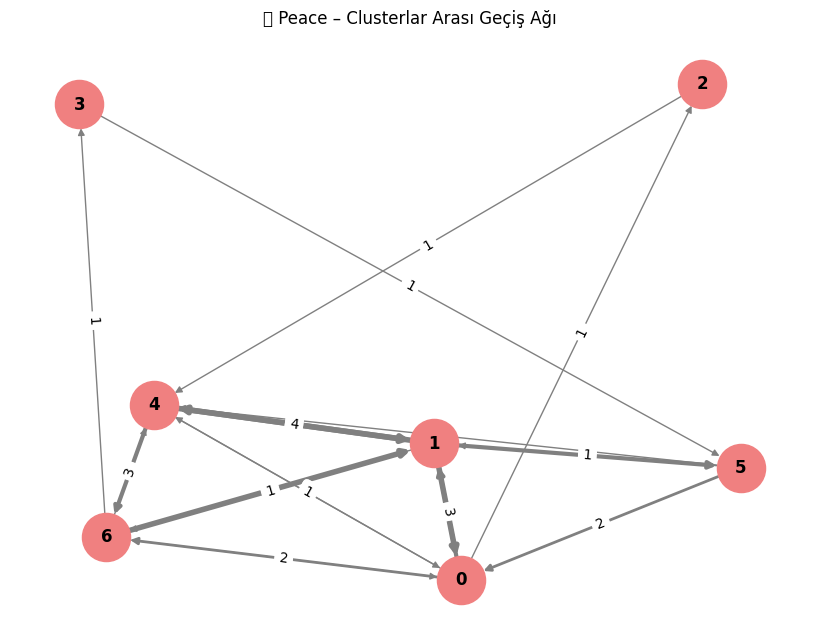

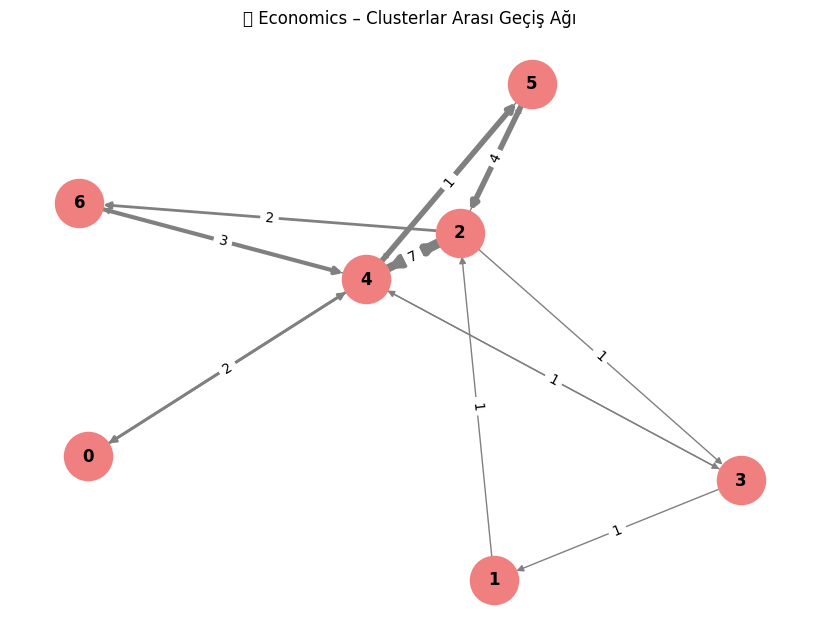

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def build_cluster_transition_network(df, title):
    year_cluster = df.groupby("Year")["Cluster"].agg(lambda x: x.mode()[0]).sort_index()
    transitions = []

    years = sorted(year_cluster.index)
    for i in range(1, len(years)):
        prev = year_cluster.loc[years[i - 1]]
        curr = year_cluster.loc[years[i]]
        if prev != curr:
            transitions.append((prev, curr))

    transition_counts = Counter(transitions)

    # Graph
    G = nx.DiGraph()
    for (src, tgt), weight in transition_counts.items():
        G.add_edge(src, tgt, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightcoral',
            node_size=1200, font_weight='bold',
            width=[G[u][v]['weight'] for u,v in G.edges()],
            edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Örnek:
build_cluster_transition_network(peace_df, "🕊️ Peace – Clusterlar Arası Geçiş Ağı")
build_cluster_transition_network(econ_df, "📈 Economics – Clusterlar Arası Geçiş Ağı")


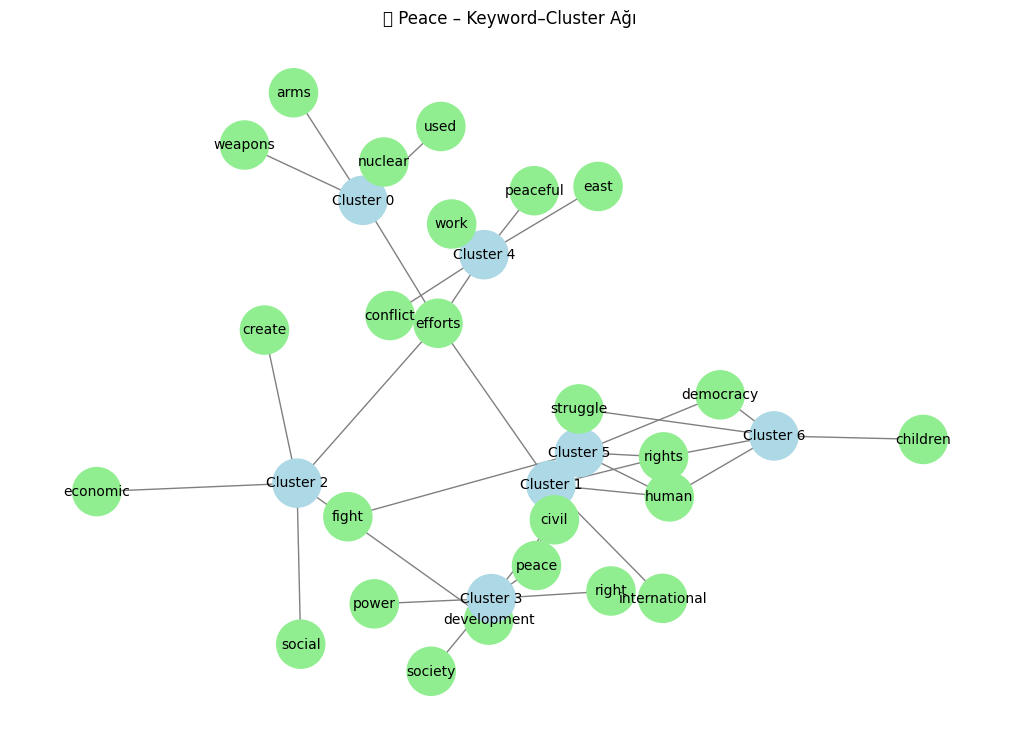

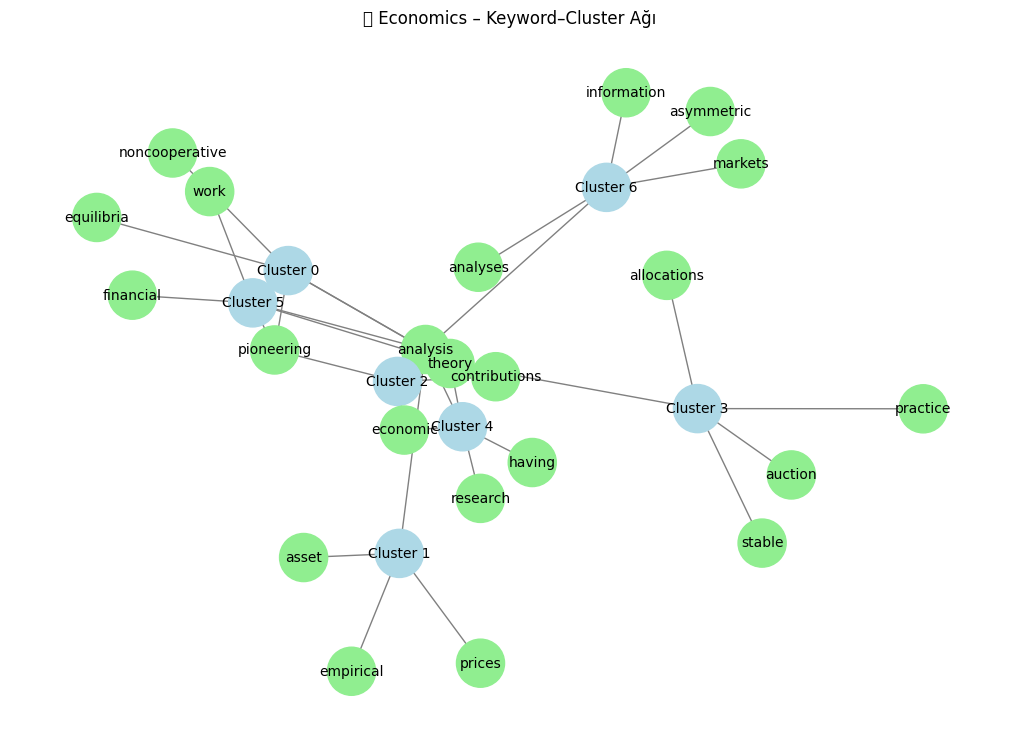

In [ ]:
from itertools import combinations
import re

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [w for w in text.split() if w not in ENGLISH_STOP_WORDS and len(w) > 2]
    return tokens

def build_keyword_cluster_bipartite(df, num_clusters, title, top_k=5):
    from collections import defaultdict

    cluster_word_counts = defaultdict(list)

    for i in range(num_clusters):
        texts = df[df["Cluster"] == i]["Motivation"].dropna().tolist()
        all_words = sum([clean_and_tokenize(t) for t in texts], [])
        word_freq = Counter(all_words).most_common(top_k)
        cluster_word_counts[i] = word_freq

    G = nx.Graph()
    for clus, word_list in cluster_word_counts.items():
        G.add_node(f"Cluster {clus}", bipartite=0)
        for word, freq in word_list:
            G.add_node(word, bipartite=1)
            G.add_edge(f"Cluster {clus}", word, weight=freq)

    # Draw
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42, k=0.7)
    colors = ['lightblue' if 'Cluster' in n else 'lightgreen' for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors,
            node_size=1200, font_size=10, edge_color='gray')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Örnek:
build_keyword_cluster_bipartite(peace_df, 7, "🕊️ Peace – Keyword–Cluster Ağı")
build_keyword_cluster_bipartite(econ_df, 7, "📈 Economics – Keyword–Cluster Ağı")


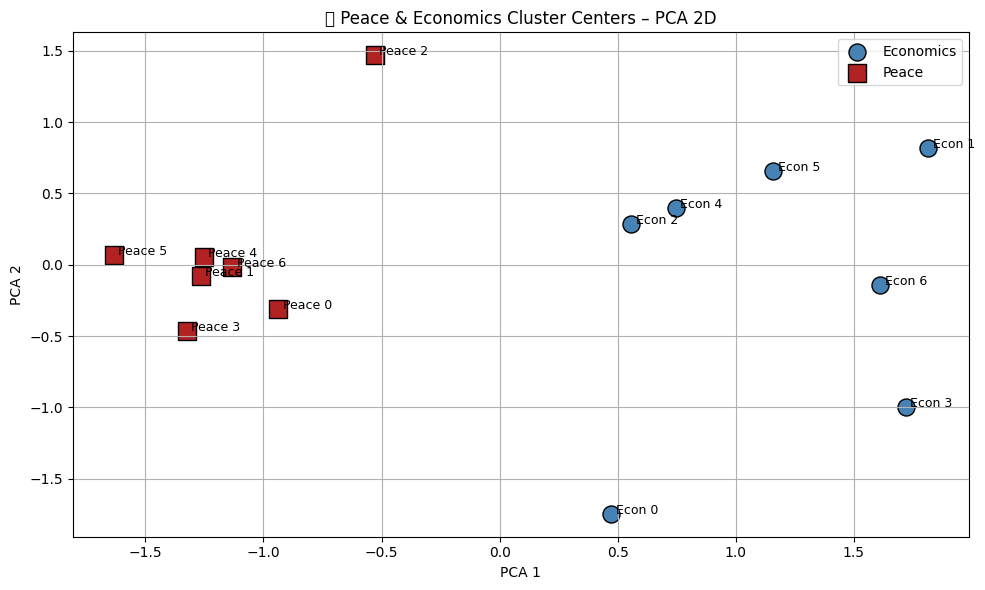

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Tüm merkezleri birleştir
all_centroids = np.vstack([
    econ_centroid_matrix,  # 0–6
    peace_centroid_matrix  # 7–13
])

# Etiketler (renk ve işaret ayrımı için)
econ_labels = [f"Econ {i}" for i in range(len(econ_centroid_matrix))]
peace_labels = [f"Peace {i}" for i in range(len(peace_centroid_matrix))]
all_labels = econ_labels + peace_labels

# PCA ile 2D indirgeme
pca = PCA(n_components=2)
reduced_centroids = pca.fit_transform(all_centroids)

# Çizim
plt.figure(figsize=(10, 6))

# Economics
plt.scatter(
    reduced_centroids[:7, 0], reduced_centroids[:7, 1],
    c="steelblue", marker="o", label="Economics", s=150, edgecolors='k'
)

# Peace
plt.scatter(
    reduced_centroids[7:, 0], reduced_centroids[7:, 1],
    c="firebrick", marker="s", label="Peace", s=150, edgecolors='k'
)

# Etiketleri ekle
for i, label in enumerate(all_labels):
    plt.text(reduced_centroids[i, 0]+0.02, reduced_centroids[i, 1], label, fontsize=9)

plt.title("📍 Peace & Economics Cluster Centers – PCA 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Co-Clustering row labels (ilk 20): [3 3 0 3 3 3 3 3 3 4 4 0 3 3 0 3 3 3 3 0]


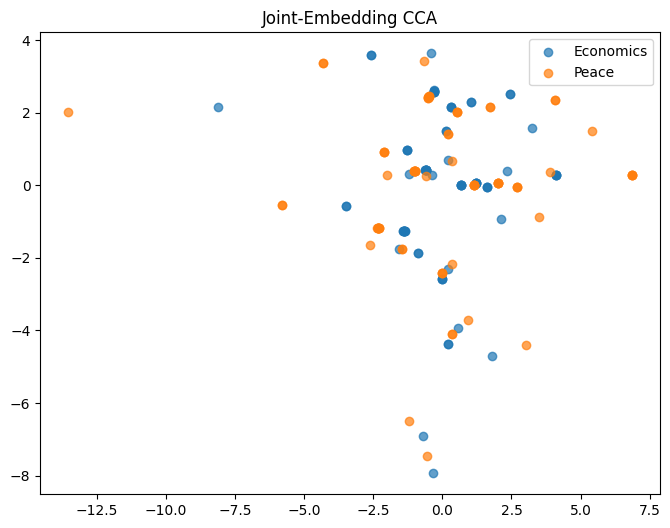

In [ ]:
# 2. Joint-Embedding ve Co-Clustering
# -------------------------------------------------
import numpy as np
from sklearn.cluster import SpectralCoclustering
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

# Önce embedleri numpy array olarak alıyoruz (eğer daha önce elde etmediyseniz)
econ_embeddings = np.array(model.encode(econ_df["Motivation"].tolist()))
peace_embeddings = np.array(model.encode(peace_df["Motivation"].tolist()))

all_embeddings = np.vstack([econ_embeddings, peace_embeddings])

# 2a. Spektral co-clustering
coclust = SpectralCoclustering(n_clusters=5, random_state=42)
coclust.fit(all_embeddings)
print("Co-Clustering row labels (ilk 20):", coclust.row_labels_[:20])

# 2b. Canonical Correlation Analysis
min_len = min(len(econ_embeddings), len(peace_embeddings))
cca = CCA(n_components=2)
cca.fit(econ_embeddings[:min_len], peace_embeddings[:min_len])
econ_c, peace_c = cca.transform(econ_embeddings[:min_len], peace_embeddings[:min_len])

plt.figure(figsize=(8,6))
plt.scatter(econ_c[:,0], econ_c[:,1], label="Economics", alpha=0.7)
plt.scatter(peace_c[:,0], peace_c[:,1], label="Peace",     alpha=0.7)
plt.legend(); plt.title("Joint-Embedding CCA"); plt.show()


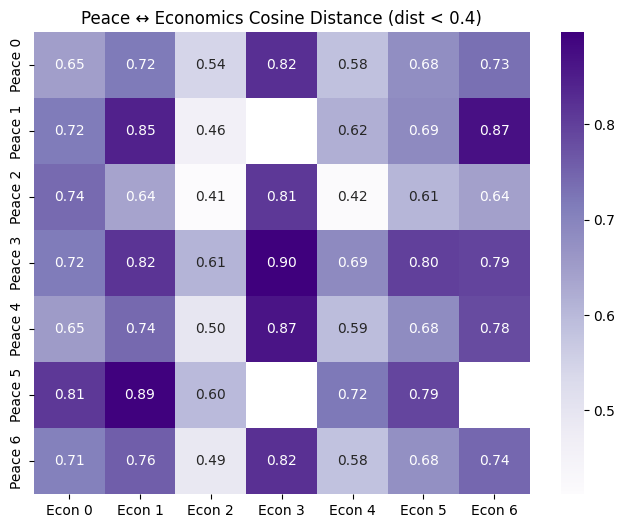

In [ ]:
import seaborn as sns

threshold = 0.9
mask = cross_dist > threshold

plt.figure(figsize=(8,6))
sns.heatmap(
    cross_dist,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="Purples",
    xticklabels=[f"Econ {i}" for i in range(cross_dist.shape[1])],
    yticklabels=[f"Peace {i}" for i in range(cross_dist.shape[0])]
)
plt.title("Peace ↔ Economics Cosine Distance (dist < 0.4)"); plt.show()

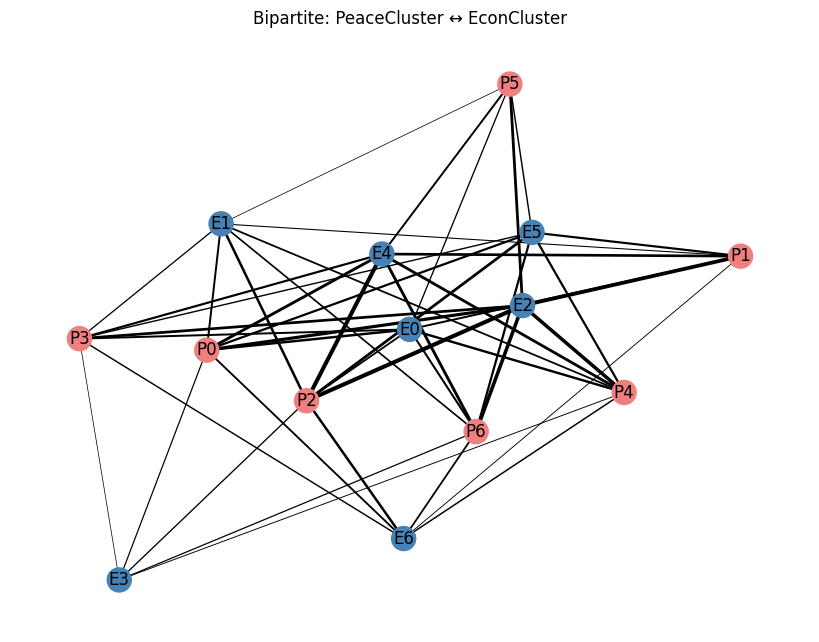

In [ ]:
# -------------------------------------------------
import networkx as nx

B = nx.Graph()
# Düğümleri ekleyelim
for i in range(peace_centroid_matrix.shape[0]):
    B.add_node(f"P{i}", bipartite=0)
for j in range(econ_centroid_matrix.shape[0]):
    B.add_node(f"E{j}", bipartite=1)

# Eşik altındaki mesafelere kenar ekle
for i in range(cross_dist.shape[0]):
    for j in range(cross_dist.shape[1]):
        if cross_dist[i,j] < threshold:
            B.add_edge(f"P{i}", f"E{j}", weight=1-cross_dist[i,j])

pos = nx.spring_layout(B, seed=42)
plt.figure(figsize=(8,6))
nx.draw(
    B, pos,
    with_labels=True,
    node_color=[ 'lightcoral' if n.startswith('P') else 'steelblue' for n in B.nodes() ],
    width=[B[u][v]['weight']*5 for u,v in B.edges()]
)
plt.title("Bipartite: PeaceCluster ↔ EconCluster"); plt.show()
